<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/Predictor_Lazy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
#Instalamos libreria del predictor al entorno
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
#Importamos librerias
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

In [143]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.80,7.33,5.64,18.05,15.04,784.55,145.08,AL
1,18.10,7.42,4.53,16.29,17.01,1053.48,133.93,AK
2,18.60,6.51,5.21,15.62,17.86,899.47,110.35,AZ
3,22.40,4.03,5.82,21.06,21.28,827.34,142.39,AR
4,12.00,4.20,3.36,10.92,10.68,878.41,165.63,CA


**Buscamos otros modelos con el predictor Lazy**

In [144]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['ins_losses']]
Var_Dep= df['total']

In [145]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [146]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [147]:
#Vamos a crear un objeto de la clase LazyRegressor:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric = None)

In [148]:
#Ajustamos nuestros datos de entrenamiento y prueba al objeto LazyRegressor:
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 76%|███████▌  | 32/42 [00:01<00:00, 33.80it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(35, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:01<00:00, 25.28it/s]

[04:18:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
LinearSVR                                    0.02       0.09   2.83   
SGDRegressor                                -0.37      -0.28   3.35   
LGBMRegressor                               -0.38      -0.29   3.36   
HistGradientBoostingRegressor               -0.38      -0.29   3.36   
LassoLarsIC                                 -0.38      -0.29   3.36   
LassoLarsCV                                 -0.38      -0.29   3.36   
LassoCV                                     -0.38      -0.29   3.36   
Lasso                                       -0.38      -0.29   3.36   
LarsCV                                      -0.38      -0.29   3.36   
LassoLars                                   -0.38      -0.29   3.36   
DummyRegressor       

In [153]:
#Importamos la función del modelo con mejor desempeño de la libreria Sklearn
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

In [155]:
#Ajustamos el modelo con los parámetros por default
L_SVR = LinearSVR()
L_SVR.fit(X_train, y_train)

LinearSVR()

In [157]:
#Obtenemos datos predecidos
ypred = L_SVR.predict(X_test)
ypred

array([10.86366848, 11.20623411,  9.88728978,  7.93319944,  8.31575327,
       10.20586248,  8.61366541, 10.2858389 ,  6.63624862, 12.09263934,
       10.57042163,  8.25777038, 10.9589737 ,  8.26643449,  6.47629579,
       10.58841632])

In [ ]:
#Obtenemos el error cuadrático medio 
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

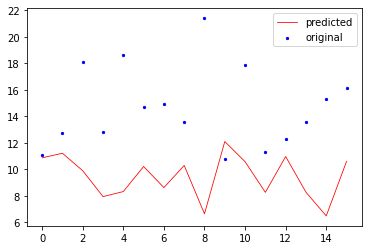

In [161]:
#Obtenemos la gráfica de la predicción
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()